#  Constructing an Hexagon Map for a Sphere

Square maps are great for tabletop games, but what about hexagons?

Hexagons are often used to simulate a space where things are more equally spaced in every direction, but these are not easy to represent in a computer array.  Not easy, but possible.

The second thing about hexagons is that you can use them to map a space onto a sphere, like a football with a mix of hexagons and 12 pentagons.  The football has 20 hexagons and 12 pentagons, but if you use more hexagons, you will always have 12 pentagons like the points on a 20 sided dice (Icosahedron - https://en.wikipedia.org/wiki/Icosahedron)

In [1]:
from copy import copy
%matplotlib inline

##### Import Local Functions

In [2]:
from turtle import Turtle
from hex_map import world_map, local_map, empty_map, full_map
from hex_map_construct import perimeter, fill_centre, set_virtual, STEPS
from hex_map_construct import EMPTY, COMMON, POLE, PENTAGON, VIRTUAL, EDGE, VERBOTEN, WRAP

### How do these hexagons map to a sphere
The blue hexagons are mapped to the hexagons on a football.  The green hexagons are in fact pentagons, so the edge attached to a yellow hexagon does not exist in reality,  The purple hexagons are the same location on the sphere, but are also in fact the pentagons on the football.  They are equivalent to the green hexagons.  The aqua hexagons are the "poles" of the sphere and therefore equivalent and also pentagons.  The red hexagons are not accessible.  The yellow hexagons should be mapped to another hexagon in the map.

### Expanding the map
It seems that we can build a map by drawing a perimeter, then filling in the middle

##### Initalise the World

In [3]:
world = empty_map(STEPS * 12)
turtle = Turtle(world)
turtle.place(2, (STEPS + 1) * 6)

##### Draw the perimeter with the turtle

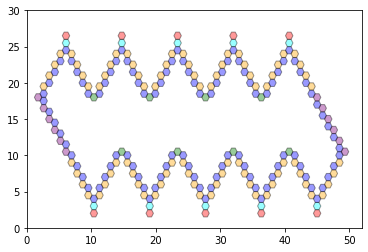

In [4]:
perimeter(turtle)
world_map(world)

##### Fill the middle with blues

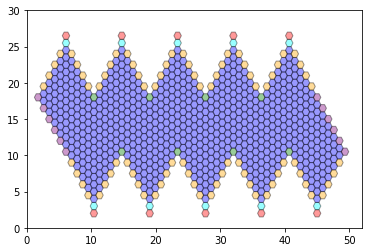

In [5]:
fill_centre(world)
world_map(world)

##### Add the virtual hexagons around the outside

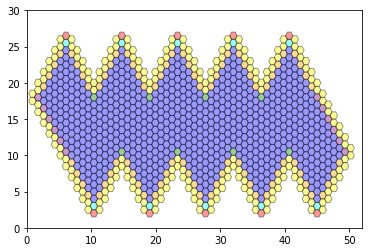

In [6]:
set_virtual(world)
world_map(world)

### Navigating the map
The solution to navigating the map is to create a virtual turtle and head out to find a valid tile to land on and a valid direction to point.  There is also the consideration of tiles that have two or more logical tiles, but only one physical tile.  

In [7]:
def move(turtle):
    if turtle.state(COMMON):
        print("COMMON")
    if turtle.state(POLE):
        print("POLE")
    if turtle.state(PENTAGON):
        print("PENTAGON")
    if turtle.state(EDGE):
        print("EDGE")
    if turtle.state(WRAP):
        print("WRAP")
        turtle = from_wrap(turtle)
    return turtle

In [8]:
def from_wrap(turtle):
    newt = copy(turtle)
    newt.move()
    if newt.state(COMMON):
        print("COMMON")
        turtle = copy(newt)
    else:
        print("Not COMMON")
        vurtle = copy(turtle)
        for x in range(turtle.x, len(turtle.bitmap[0]), 2):
            if turtle.bitmap[x, turtle.y] == WRAP:
                vurtle.x = x
        newt = copy(vurtle)
        newt.move()
        if newt.state(COMMON):
            print("Virtual COMMON")
            turtle = copy(newt)
        else:
            print("Virtual Not COMMON")
            newt = copy(turtle)
            newt.left()
            newt.move()
            if newt.state(COMMON):
                print("Left COMMON")
                turtle = copy(newt)
            else:
                print("Not Left COMMON")
                newt = copy(vurtle)
                newt.left()
                newt.move()
                if newt.state(COMMON):
                    print("Virtual Left COMMON")
                    turtle = copy(newt)
                else:
                    print("Should Not Happen")
                    raise Exception
    return turtle            

##### Test the movement from the northern pentagon WRAP tile

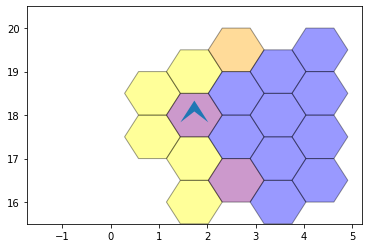

WRAP
Not COMMON
Virtual Not COMMON
Not Left COMMON
Virtual Left COMMON


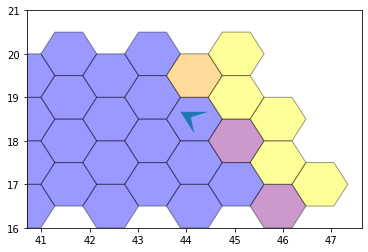

In [9]:
turtle.place(2, 36, 0)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)

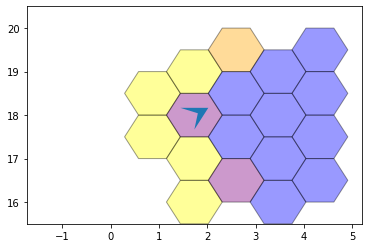

WRAP
COMMON


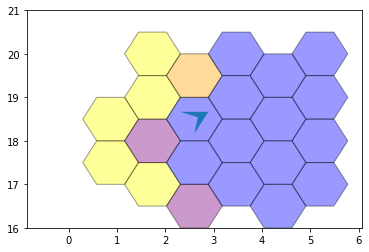

In [10]:
turtle.place(2, 36, 1)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)

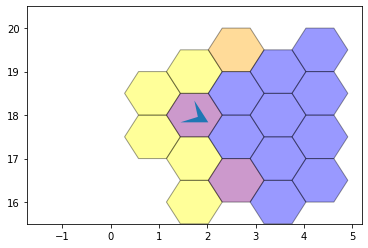

WRAP
COMMON


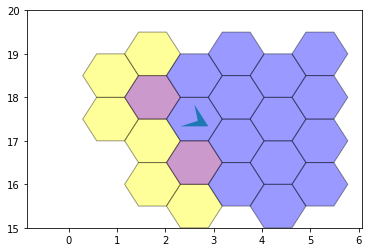

In [11]:
turtle.place(2, 36, 2)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)

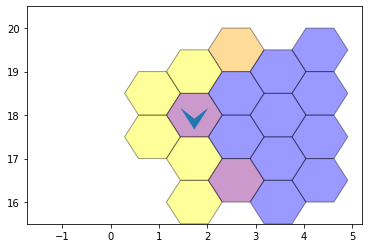

WRAP
Not COMMON
Virtual COMMON


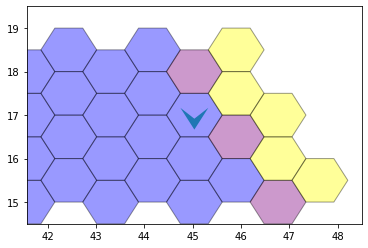

In [12]:
turtle.place(2, 36, 3)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)

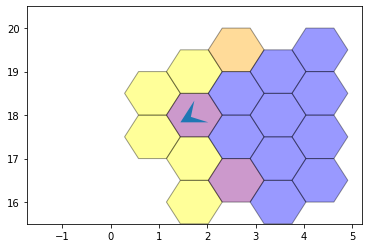

WRAP
Not COMMON
Virtual COMMON


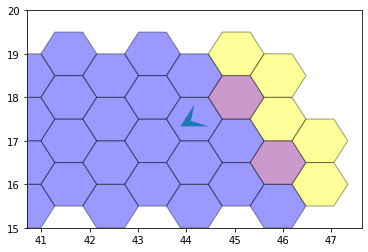

In [13]:
turtle.place(2, 36, 4)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)

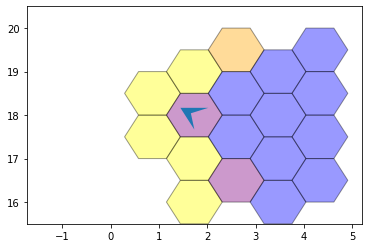

WRAP
Not COMMON
Virtual COMMON


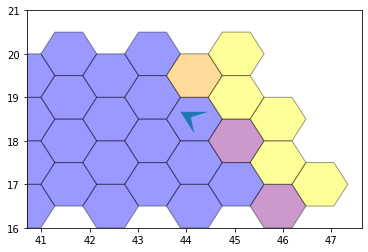

In [14]:
turtle.place(2, 36, 5)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)

##### Test the movement from the normal WRAP tile

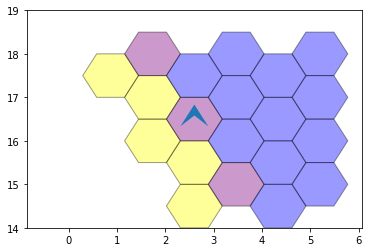

WRAP
COMMON


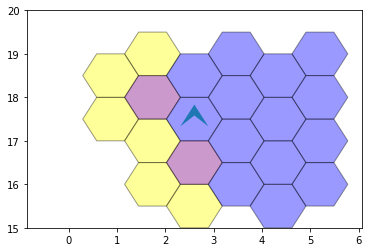

In [15]:
turtle.place(3, 33, 0)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)

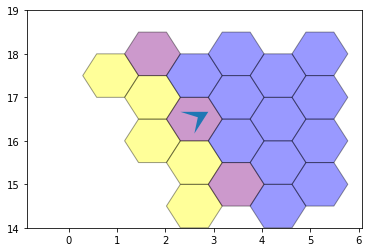

WRAP
COMMON


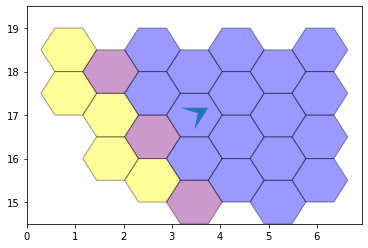

In [16]:
turtle.place(3, 33, 1)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)

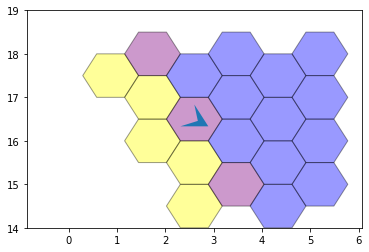

WRAP
COMMON


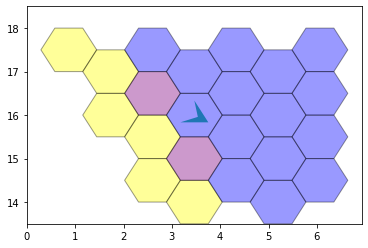

In [17]:
turtle.place(3, 33, 2)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)

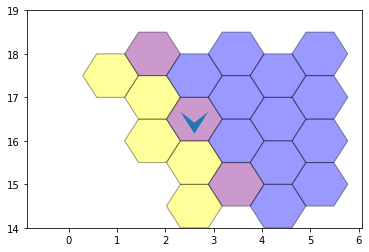

WRAP
Not COMMON
Virtual COMMON


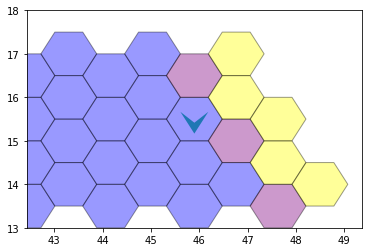

In [18]:
turtle.place(3, 33, 3)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)

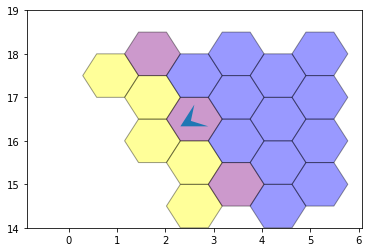

WRAP
Not COMMON
Virtual COMMON


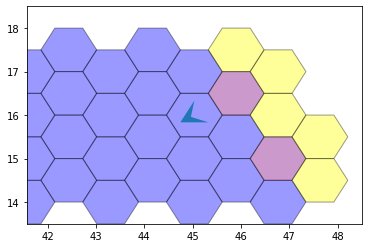

In [19]:
turtle.place(3, 33, 4)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)

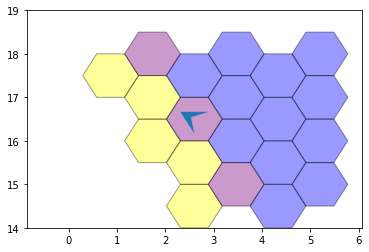

WRAP
Not COMMON
Virtual COMMON


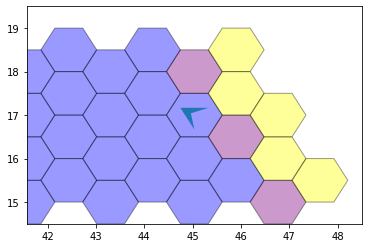

In [20]:
turtle.place(3, 33, 5)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)

##### Test the movement from the northern pentagon WRAP tile

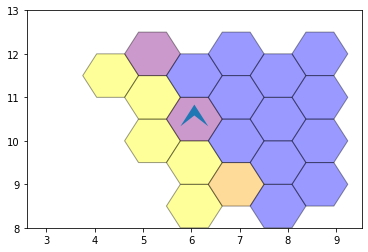

WRAP
COMMON


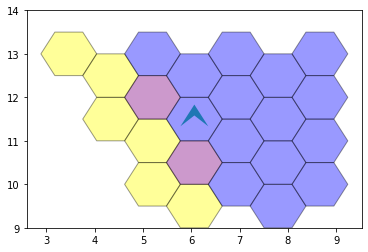

In [21]:
turtle.place(7, 21, 0)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)

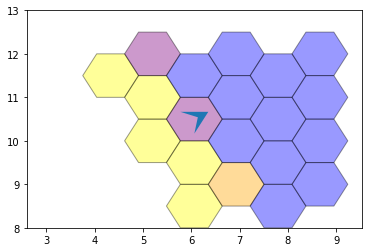

WRAP
COMMON


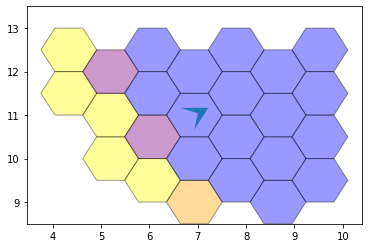

In [22]:
turtle.place(7, 21, 1)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)

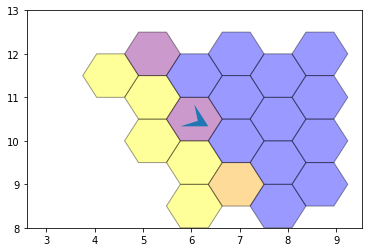

WRAP
COMMON


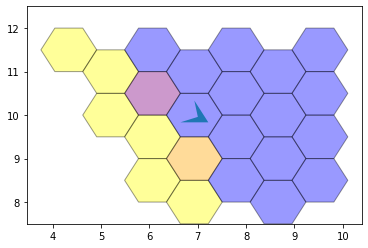

In [23]:
turtle.place(7, 21, 2)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)

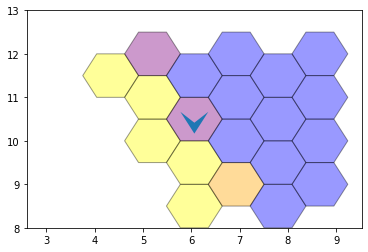

WRAP
Not COMMON
Virtual Not COMMON
Left COMMON


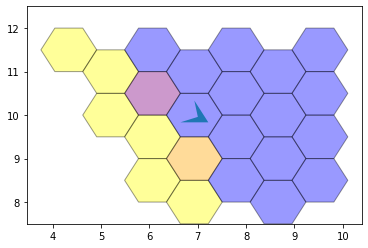

In [24]:
turtle.place(7, 21, 3)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)

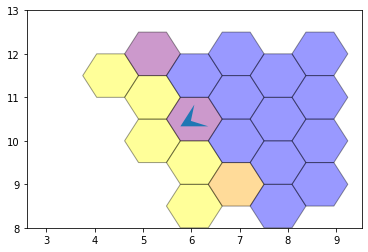

WRAP
Not COMMON
Virtual COMMON


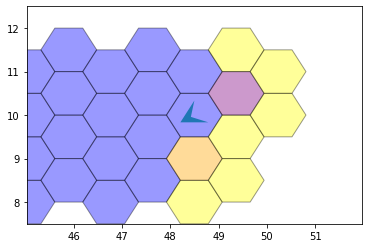

In [25]:
turtle.place(7, 21, 4)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)

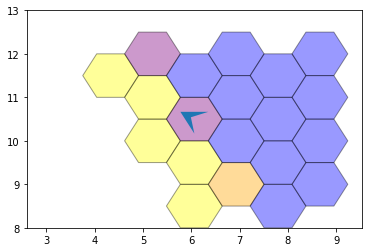

WRAP
Not COMMON
Virtual COMMON


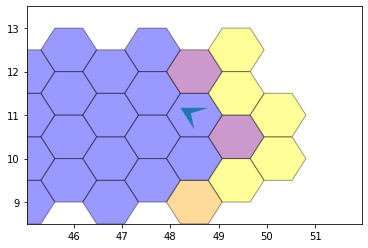

In [26]:
turtle.place(7, 21, 5)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)